Time series Analysis 

1. Pandas Data Reader

In [3]:
pip install pandas-datareader;

Note: you may need to restart the kernel to use updated packages.


In [223]:
import pandas_datareader as pdr
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf

In [7]:
df = yf.download('TSLA')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [9]:
df.columns = df.columns.droplevel(1)

In [10]:
df[['Open', 'Close']].plot(xlim=['2020-01-01', '2025-01-01'], ylim=[0, 500], figsize=(12, 5), color=['green', 'red'])


<Axes: xlabel='Date'>

In [11]:
index = df.loc['2020-06-29':'2021-07-13'].index

In [12]:
Opendf = df.loc['2020-06-29':'2021-07-13']['Open']

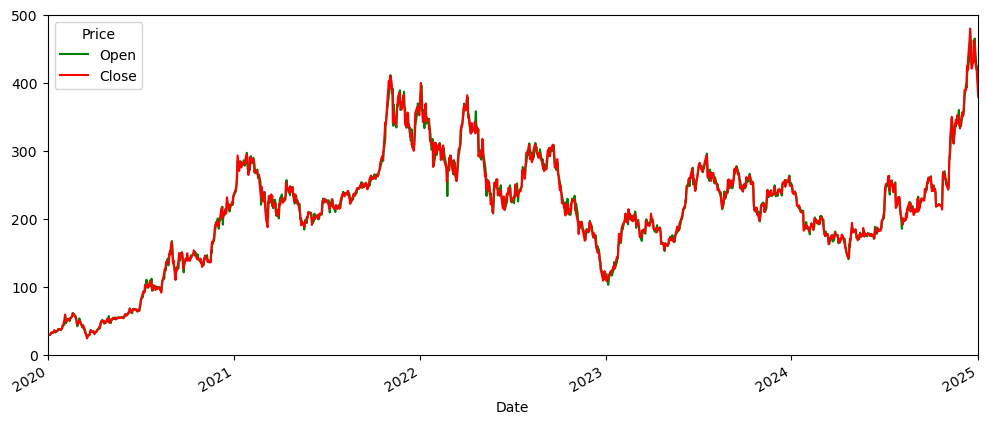

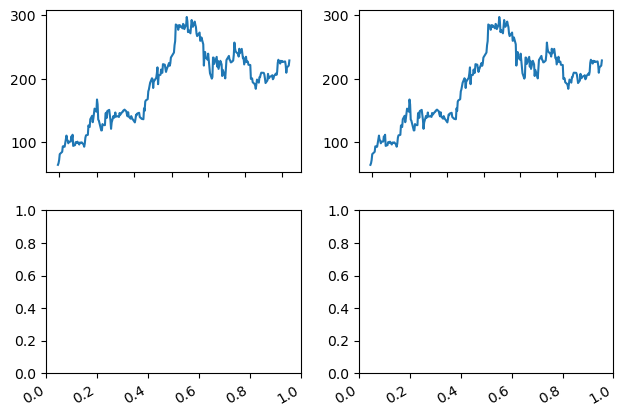

In [13]:
figure,axis = plt.subplots(2,2)
plt.tight_layout()
axis[0,0].plot(index,Opendf)
axis[0,1].plot(index,Opendf)
figure.autofmt_xdate()
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3709 entries, 2010-06-29 to 2025-03-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3709 non-null   float64
 1   High    3709 non-null   float64
 2   Low     3709 non-null   float64
 3   Open    3709 non-null   float64
 4   Volume  3709 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 302.9 KB


In [15]:
df = df.reset_index()

In [45]:
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [47]:
df.set_index('Date', drop = True)

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-03-20,236.259995,238.000000,230.050003,233.350006,99028300
2025-03-21,248.710007,249.520004,234.550003,234.990005,132728700
2025-03-24,278.390015,278.640015,256.329987,258.079987,169079900


In [49]:
## datetime 
from datetime import datetime

In [63]:
def addition(x,y):
    return x*y

In [77]:
start_time = datetime.now()
x = 422223
y = 12
addition(x,y)
end_time = datetime.now()
print(end_time - start_time)

0:00:00.000995


## Time sampling 

In [138]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [133]:
df.set_index('Date',inplace = True);

In [181]:
df.resample(rule = 'ME').max();

In [200]:
df.resample('W').apply(lambda x: x.max() - x.min())['High']

Date
2010-07-04     0.488000
2010-07-11     0.224666
2010-07-18     0.228666
2010-07-25     0.090000
2010-08-01     0.070666
                ...    
2025-03-02    48.519989
2025-03-09    37.690002
2025-03-16    16.309998
2025-03-23    19.419998
2025-03-30     9.559998
Freq: W-SUN, Name: High, Length: 770, dtype: float64

C:\Users\mdamb\AppData\Local\Temp\ipykernel_15100\3887689377.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').max()['Open'].plot(kind = 'bar', figsize=(12,5))


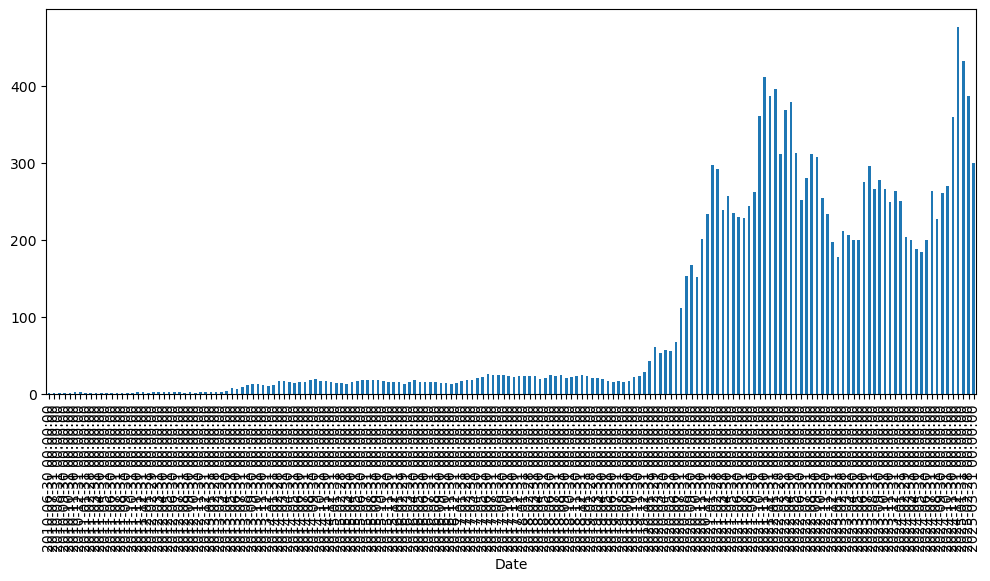

In [233]:
df.resample('M').max()['Open'].plot(kind = 'bar', figsize=(12,5))
plt.show()

# Rolling ka use Technical Indicator Banane me bhot use hota h 

In [239]:
df.rolling(5).max();

In [265]:
df['OpenRolling'] = df.rolling(30).mean()['Open']

In [251]:
df.head(30);

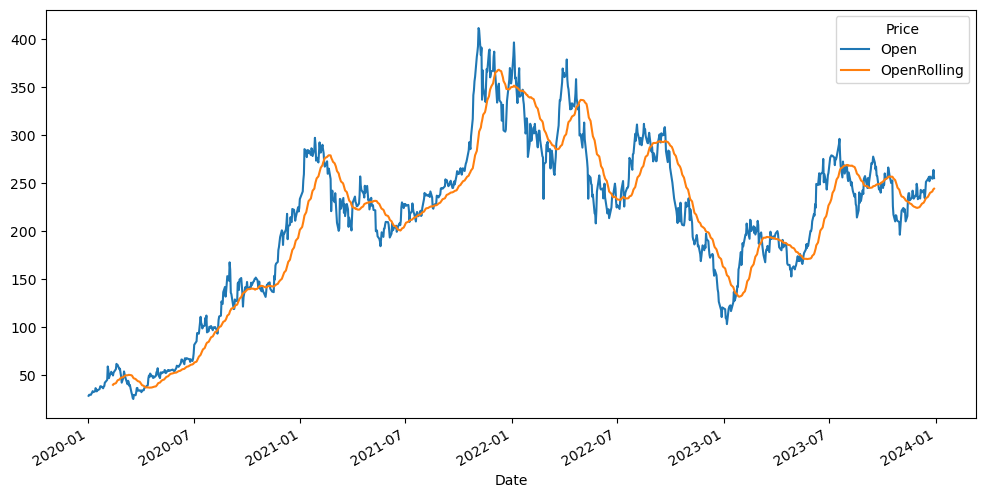

In [267]:
df[['Open','OpenRolling']].plot(figsize=(12,6))
plt.show()

In [263]:
df = df.loc['2020-01-01':'2024-01-01']

## Assignment 
1. Get Microsoft data through pandas data reader
2. Maximum share price from the 2017 to 2022 
3. Date when the price is at the lowest means min
4. Date when the price is at its peak means max